# 📊 03 - Reporting & Root Cause Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns


BASE_DIR = Path.cwd()
DATA_PATH = BASE_DIR / "data" / "mapping_results.csv"

if not DATA_PATH.exists():  
    raise FileNotFoundError(f"Data file not found at {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df.head()

,study_id,intervention_name,condition,sponsor,start_date,end_date,phase,status,completeness_score,study_duration_days,mapped_term,match_score,mapping_status
0,NCT100000,Aspirin,Covid-19,Sanofi,2022-09-20,2025-04-07,Phase 2,Withdrawn,1.000,930.0,Aspirin,100,mapped
1,NCT100001,Trastuzumab,Alzheimer'S Disease,Pfizer,2023-07-01,2024-09-05,NaN,Terminated,0.875,432.0,Trastuzumab,100,mapped
2,NCT100002,Donepezil,Hypertension,Pfizer,2021-08-17,2025-05-24,Phase 1,Completed,1.000,1376.0,Donepezil,100,mapped
3,NCT100003,Remdesivir,Breast Cancer,Sanofi,2022-04-15,2025-05-20,Phase 1,Terminated,1.000,1131.0,Remdesivir,100,mapped
4,NCT100004,Aspirin,Breast Cancer,Pfizer,2023-09-10,2024-08-28,Phase 4,Completed,1.000,353.0,Aspirin,100,mapped


## 📈 Data Quality Summary

In [2]:
# Check for missing values in key columns
missing_values = df[['intervention_name', 'condition', 'phase', 'status']].isnull().sum()
print("Missing Values Summary:\n", missing_values)

# Percentage of mapped interventions
mapped_percent = (df['mapping_status'] == 'mapped').mean() * 100
print(f"\n{mapped_percent:.2f}% of interventions successfully mapped to ontology.")

Missing Values Summary:
 intervention_name     61
condition             35
phase                252
status                 0
dtype: int64

94.92% of interventions successfully mapped to ontology.


## 📊 Visualizing Mapping Status

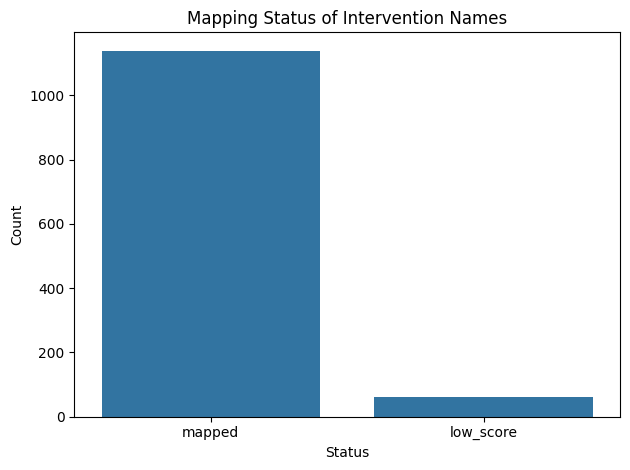

In [3]:
sns.countplot(data=df, x='mapping_status')
plt.title("Mapping Status of Intervention Names")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 🔍 Root Cause Analysis (Why Data Fails)

In [4]:
failures = df[df['mapping_status'] != 'mapped']

# Top reasons: missing, low match scores, etc.
print("Top Reasons for Mapping Failures:")
print(failures['mapping_status'].value_counts())

# Sample failed mappings
failures[['intervention_name', 'mapped_term', 'match_score', 'mapping_status']].head(10)

Top Reasons for Mapping Failures:
mapping_status
low_score    61
Name: count, dtype: int64


,intervention_name,mapped_term,match_score,mapping_status
14,NaN,Metformin,45,low_score
53,NaN,Metformin,45,low_score
97,NaN,Metformin,45,low_score
112,NaN,Metformin,45,low_score
113,NaN,Metformin,45,low_score
124,NaN,Metformin,45,low_score
132,NaN,Metformin,45,low_score
150,NaN,Metformin,45,low_score
157,NaN,Metformin,45,low_score
161,NaN,Metformin,45,low_score


## 💾 Save Summary for Dashboard or Report

In [7]:
# Summary metrics
summary = {
    'total_records': len(df),
    'mapped_count': int((df['mapping_status'] == 'mapped').sum()),
    'missing_count': int((df['mapping_status'] == 'missing').sum()),
    'low_score_count': int((df['mapping_status'] == 'low_score').sum()),
    'mapping_success_rate': round(mapped_percent, 2)
}

# Convert to DataFrame and export
summary_df = pd.DataFrame([summary])
summary_df.to_csv(DATA_PATH.parent / "mapping_summary_report.csv", index=False)
summary_df

,total_records,mapped_count,missing_count,low_score_count,mapping_success_rate
0,1200,1139,0,61,94.92
